# MSBA 315 Assignment 5: Who is going to buy?

## Libraries

In [34]:
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from numpy import percentile
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict 


## Load Data

In [35]:
buy = pd.read_csv('train.csv')

C:\Users\Omar\AppData\Local\Temp\ipykernel_3576\44669241.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  buy = pd.read_csv('train.csv')


## Explore Data

In [36]:
print(buy.shape)
buy.head()

(396875, 18)


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18
0,b519c75c-f6fa-434c-81e8-cae20d82c8bb,082f3074-39b5-448d-b696-1e99de783de7,2017-03-07T00:17:41.049Z,2017-03-07T00:47:41.049Z,2016-06-26T00:00:00.180Z,420,PAGE_LOAD,0,NC,0,0.0,F,10.0,50.0,1.0,1048576.00,IGNORED,0
1,ef0fe1e7-432c-4cb0-b320-68d6186c92d4,4cc4beb5-1352-4ff7-aecf-f742ea4eb8de,2017-03-06T03:30:09.544Z,2017-03-06T04:00:09.544Z,2016-09-16T00:00:00.180Z,420,PAGE_LOAD,0,NC,0,0.0,F,10.0,50.0,1.0,2078102.25,IGNORED,0
2,e56669c6-83e8-4946-9c85-f59690aace0c,70b9ed34-4de3-47c4-ae00-2a0f4cd4579f,2017-03-03T07:17:25.925Z,2017-03-03T07:47:25.925Z,2017-01-17T05:48:46.209Z,480,PAGE_LOAD,0,NC,0,0.0,P,75.0,950.0,1.0,1048576.00,IGNORED,0
3,462fcaa1-b446-4533-9f35-cca47c631f9a,5838186d-164f-4f51-bd35-c82a293d5e14,2017-03-06T14:31:23.833Z,2017-03-06T15:01:23.833Z,2017-02-01T12:49:56.329Z,480,PAGE_LOAD,0,NC,0,0.0,P,10.0,50.0,1.0,1048576.00,IGNORED,0
4,3d27be7d-cba4-4955-8e46-5f78229c71b1,ee595e60-f3b3-44e7-bf78-25c834931ab9,2017-03-03T15:45:27.598Z,2017-03-03T16:15:27.598Z,2017-02-01T15:45:43.210Z,480,PAGE_LOAD,0,NC,0,0.0,F,10.0,50.0,1.0,1048576.00,IGNORED,0


In [37]:
buy.dtypes

col1      object
col2      object
col3      object
col4      object
col5      object
col6       int64
col7      object
col8       int64
col9      object
col10      int64
col11    float64
col12     object
col13    float64
col14    float64
col15    float64
col16    float64
col17     object
col18     object
dtype: object

In [38]:
buy = buy.rename(columns = {'col1':'user_id', 'col2':'session_id','col3':'session_start_time', 'col4':'session_expiry_time',  'col5':'event_time',
 'col6':'event_time_zone', 'col7':'event_type', 'col8':'offer_decline_count', 'col9':'user_status', 'col10':'cart_quantity', 'col11':'cart_total',
 'col12':'last_offer_type', 'col13':'last_reward_value', 'col14':'last_spend_value', 'col15':'offer_display_count', 'col16':'user_screen_size',
 'col17':'offer_acceptance_state', 'col18':'converted'})

buy.describe()

,event_time_zone,offer_decline_count,cart_quantity,cart_total,last_reward_value,last_spend_value,offer_display_count,user_screen_size
count,396875.000000,396875.000000,396875.000000,396875.000000,276353.000000,276353.000000,276353.000000,3.968750e+05
mean,319.967395,0.003613,0.801547,109.788411,15.172153,150.972380,1.357789,2.445167e+06
std,118.963533,0.065962,4.128173,1337.860927,18.010128,294.921956,3.576920,1.333466e+06
min,-780.000000,0.000000,0.000000,0.000000,5.000000,50.000000,1.000000,0.000000e+00
25%,300.000000,0.000000,0.000000,0.000000,10.000000,50.000000,1.000000,1.483776e+06
50%,300.000000,0.000000,0.000000,0.000000,10.000000,50.000000,1.000000,2.529280e+06
75%,420.000000,0.000000,1.000000,25.660000,10.000000,100.000000,1.000000,3.145728e+06
max,720.000000,14.000000,288.000000,239335.800000,100.000000,2000.000000,479.000000,4.515840e+07


In [39]:
buy.nunique()

user_id                   253680
session_id                396875
session_start_time        396553
session_expiry_time       396568
event_time                396494
event_time_zone               31
event_type                     2
offer_decline_count            7
user_status                    2
cart_quantity                140
cart_total                 13953
last_offer_type                4
last_reward_value             12
last_spend_value              34
offer_display_count          126
user_screen_size            2465
offer_acceptance_state         3
converted                      5
dtype: int64

In [40]:
# Get the unique values in 'converted'
unique_values = buy['converted'].unique()

# Print the unique values
print(unique_values)

[0 1 '0' '1' 'FALSE']


In [41]:
# count the number of null values in each column of the DataFrame
null_counts = buy.isnull().sum(axis=0)

print(null_counts)

user_id                        0
session_id                     0
session_start_time             0
session_expiry_time            0
event_time                     0
event_time_zone                0
event_type                     0
offer_decline_count            0
user_status                    0
cart_quantity                  0
cart_total                     0
last_offer_type           120522
last_reward_value         120522
last_spend_value          120522
offer_display_count       120522
user_screen_size               0
offer_acceptance_state    120522
converted                      0
dtype: int64


In [42]:
# find duplicates
dups = buy.duplicated()

# report if there are any duplicates
print(f"Are there any duplicates? {dups.any()}")
print(f"There are {dups.sum()} duplicate rows")

Are there any duplicates? False
There are 0 duplicate rows


C:\Users\Omar\AppData\Local\Temp\ipykernel_3576\1917366537.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = buy.corr()


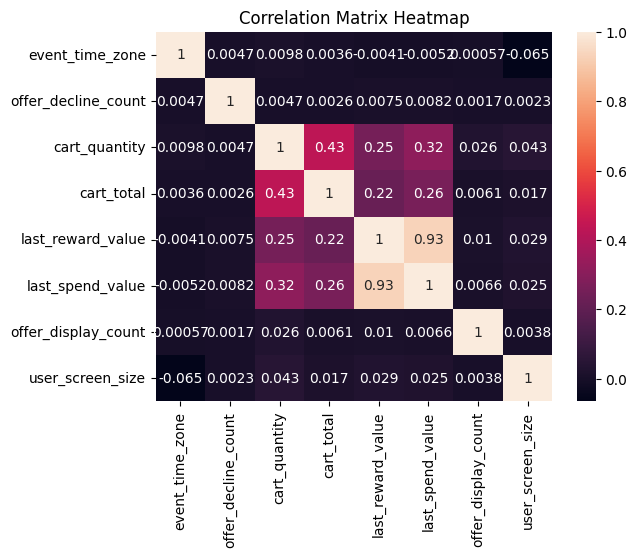

In [43]:
# create a heatmap of the correlation matrix between numerical columns
corr_matrix = buy.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [44]:
buy1 = buy.dropna()

[Text(1, 0, 'event_time_zone'),
 Text(2, 0, 'offer_decline_count'),
 Text(3, 0, 'cart_quantity'),
 Text(4, 0, 'offer_display_count'),
 Text(5, 0, 'last_spend_value'),
 Text(6, 0, 'user_screen_size'),
 Text(7, 0, 'last_reward_value'),
 Text(8, 0, 'cart_total')]

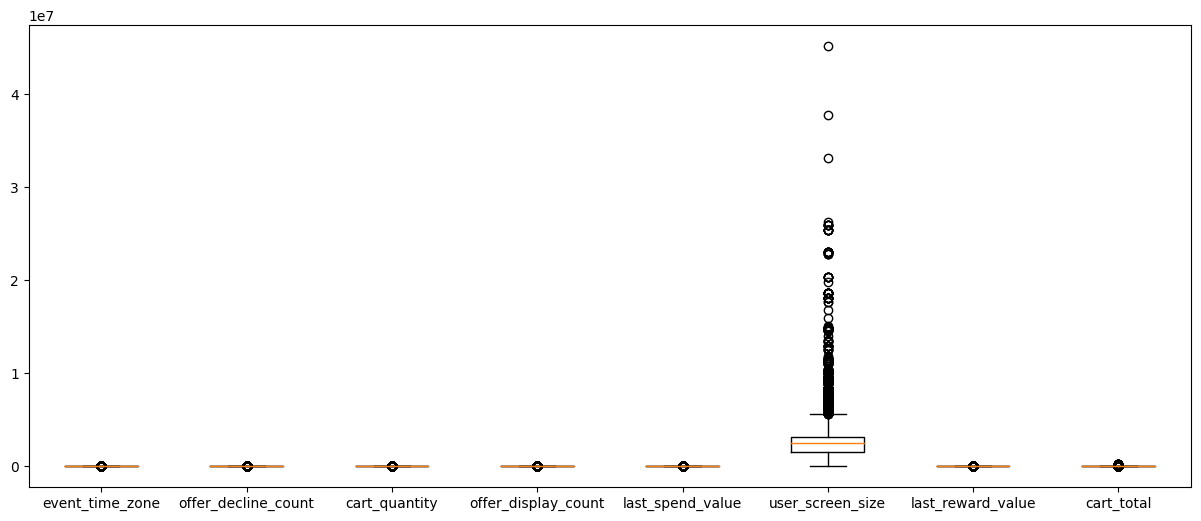

In [45]:
all_box = buy1[['event_time_zone','offer_decline_count', 'cart_quantity', 'offer_display_count', 'last_spend_value', 'user_screen_size', 'last_reward_value', 'cart_total']]

# Create the figure and set the size
fig, ax = plt.subplots(figsize=(15, 6))

# Create the boxplot
ax.boxplot(all_box)

ax.set_xticklabels(['event_time_zone','offer_decline_count', 'cart_quantity', 'offer_display_count', 'last_spend_value', 'user_screen_size', 'last_reward_value', 'cart_total'])

event_time_zone          0.056554
offer_decline_count    231.763744
cart_quantity           24.509641
offer_display_count      6.939912
last_spend_value         3.816095
user_screen_size         0.258225
last_reward_value        1.409091
cart_total             153.075774
dtype: float64


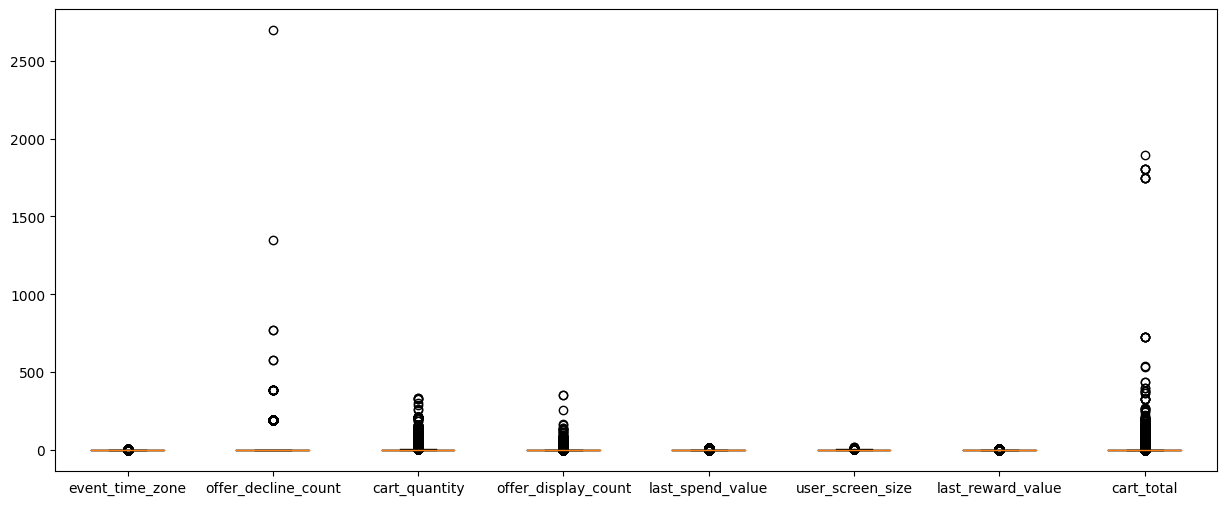

In [46]:
# Normalize the data
normalized_df = all_box / all_box.mean()

# Create the figure and set the size
fig, ax = plt.subplots(figsize=(15, 6))

# Create the boxplot
ax.boxplot(normalized_df)

ax.set_xticklabels(['event_time_zone','offer_decline_count', 'cart_quantity', 'offer_display_count', 'last_spend_value', 'user_screen_size', 'last_reward_value', 'cart_total'])

# Print the variances of the normalized data
print(normalized_df.var())

## Findings and Insights

### Null Values

The null values present in the dataset are found in the columns: last_offer_type, last_reward_value, last_spend_value, offer_display_count, and offer_acceptance_state.
It is also important to note that all of them contain an identical number of null values = 120522 meaning these null values all belong to the same rows in each column.

### Unique Values

There seems to be 5 unique values at the target variable 'converted' where there should only be 2, it is discovered that the column contains integers 0 and 1 as well as strings '0', '1', and 'False'.

### Correlation

'last_reward_value' and 'last_spend_value' appear to be highly correlated, while 'cart_total' and 'cart_quantity' appear to be somewhat correlated, and the rest have no significant correlation.

### Outliers

The analysis revealed the presence of outliers in some of the variables. After examining the context of the data the outliers were reasonable based on the subject matter and the expected range of values.

## Baseline System

In [47]:
sample = buy1
sample = sample.drop(columns=['event_time_zone', 'offer_display_count', 'last_spend_value', 'user_screen_size', 'last_reward_value', 'cart_total'])

In [48]:
X = sample.iloc[:,:-1]
y = sample['converted']

In [49]:
# ordinal encoding of feature 
ordinal_encoder = OrdinalEncoder()
X = X.astype(str)
X = ordinal_encoder.fit_transform(X)

# encoding of target variable
y = y.astype(int)


# summarize the transformed data
print('Feature', X.shape)
print(X.dtype)
print(X[:5, :])
print('Target', y.shape)
print(y[:5])
y.nunique()

Feature (276353, 11)
float64
[[9.79410e+04 8.79200e+03 2.61747e+05 2.61509e+05 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 2.00000e+00]
 [1.29304e+05 8.25750e+04 2.10358e+05 2.09773e+05 1.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 2.00000e+00]
 [1.24096e+05 1.21694e+05 2.21470e+04 2.20330e+04 2.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 2.00000e+00 2.00000e+00]
 [3.78950e+04 9.52650e+04 2.30962e+05 2.30642e+05 3.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 2.00000e+00 2.00000e+00]
 [3.29440e+04 2.57335e+05 3.91810e+04 3.87400e+04 4.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 2.00000e+00]]
Target (276353,)
0    0
1    0
2    0
3    0
4    0
Name: converted, dtype: int32


2

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred_labels = model.predict(X_test)
y_pred_scores = model.predict_proba(X_test)[:,1] 

y_pred_labels_train = model.predict(X_train)
y_pred_scores_train = model.predict_proba(X_train)[:, 1]

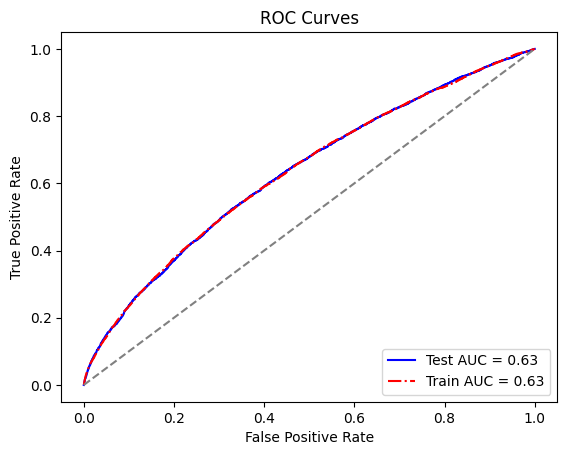

In [53]:
# Plot ROC curves for test set
fpr_test, tpr_test, thr_test = roc_curve(y_test, y_pred_scores)
auc_test = roc_auc_score(y_test, y_pred_scores)
plt.plot(fpr_test, tpr_test, '-b', label=f'Test AUC = {auc_test:.2f}')

# Plot ROC curves for train set
fpr_train, tpr_train, thr_train = roc_curve(y_train, y_pred_scores_train)
auc_train = roc_auc_score(y_train, y_pred_scores_train)
plt.plot(fpr_train, tpr_train, '-.r', label=f'Train AUC = {auc_train:.2f}')

plt.title('ROC Curves')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Improved System

In [54]:
subset = buy1.iloc[:,5:]

subset['last_value'] = subset['last_spend_value'] - subset['last_reward_value']

subset['offer_response_type'] = subset.apply(lambda x: 
    'Fixed Offer Accepted' if (x['offer_acceptance_state']=='ACCEPTED' and x['last_offer_type']=='F') 
    else 'Fixed Offer Declined' if (x['offer_acceptance_state']=='DECLINED' and x['last_offer_type']=='F') 
    else 'Variable Offer Accepted' if (x['offer_acceptance_state']=='ACCEPTED' and x['last_offer_type']!='F')
    else 'Variable Offer Declined', axis=1)

column_names = ['event_time_zone', 'event_type', 'offer_decline_count', 'user_status',
       'cart_quantity', 'cart_total', 'last_offer_type', 'last_reward_value',
       'last_spend_value', 'offer_display_count', 'user_screen_size',
       'offer_acceptance_state', 'last_value',
       'offer_response_type','converted']

# Use the reindex method to reorder the columns
subset = subset.reindex(columns=column_names)

subset = subset.drop(columns=['last_spend_value', 'last_reward_value', 'offer_acceptance_state', 'last_offer_type','offer_decline_count'])
subset.columns

Index(['event_time_zone', 'event_type', 'user_status', 'cart_quantity',
       'cart_total', 'offer_display_count', 'user_screen_size', 'last_value',
       'offer_response_type', 'converted'],
      dtype='object')

After a lot of testing with different features this gave the best AUC result

In [55]:
X = subset.iloc[:,:-1]
y = subset['converted']

# ordinal encoding of feature 
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)

# encoding of target variable
y = y.astype(int)


# summarize the transformed data
print('Feature', X.shape)
print(X.dtype)
print(X[:5, :])
print('Target', y.shape)
print(y[:5])
y.nunique()

Feature (276353, 9)
float64
[[2.400e+01 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.000e+02
  0.000e+00 3.000e+00]
 [2.400e+01 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.208e+03
  0.000e+00 3.000e+00]
 [2.500e+01 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.000e+02
  6.800e+01 3.000e+00]
 [2.500e+01 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.000e+02
  0.000e+00 3.000e+00]
 [2.500e+01 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.000e+02
  0.000e+00 3.000e+00]]
Target (276353,)
0    0
1    0
2    0
3    0
4    0
Name: converted, dtype: int32


2

>Threshold=0.00, Features=9
>Threshold=0.05, Features=8
>Threshold=0.10, Features=8
>Threshold=0.15, Features=7
>Threshold=0.20, Features=6
>Threshold=0.25, Features=6
>Threshold=0.30, Features=6
>Threshold=0.35, Features=6
>Threshold=0.40, Features=6
>Threshold=0.45, Features=6
>Threshold=0.50, Features=6


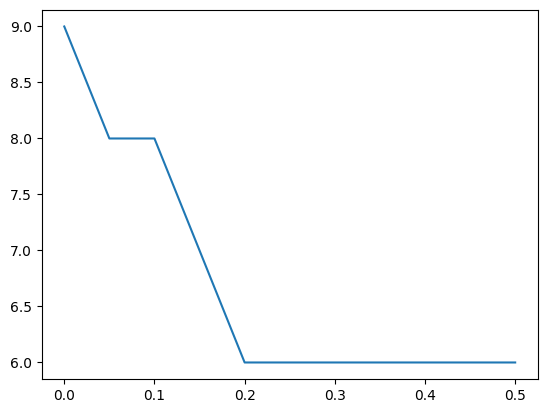

In [56]:
# define thresholds to check
thresholds = np.arange(0.0, 0.55, 0.05)

# apply transform with each threshold
results = list()
for t in thresholds:
	# define the transform
	transform = VarianceThreshold(threshold=t)
	# transform the input data
	X_sel = transform.fit_transform(X)
	# determine the number of input features
	n_features = X_sel.shape[1]
	print('>Threshold=%.2f, Features=%d' % (t, n_features))
	# store the result
	results.append(n_features)
# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.show()


In [57]:
# define the transform
transform = VarianceThreshold(threshold=0.2)
# transform the input data
X_sel = transform.fit_transform(X)
# determine the number of input features
n_features = X_sel.shape[1]
# get the Boolean mask of selected features
selected_features = transform.get_support()
# get the column names of the original feature matrix
feature_names = subset.columns
# print the selected features and their names
for feature, selected in zip(feature_names, selected_features):
    print(feature, selected)


event_time_zone True
event_type False
user_status False
cart_quantity True
cart_total True
offer_display_count True
user_screen_size True
last_value True
offer_response_type False


In [58]:
X_selected = X[:, selected_features]


X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=1)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

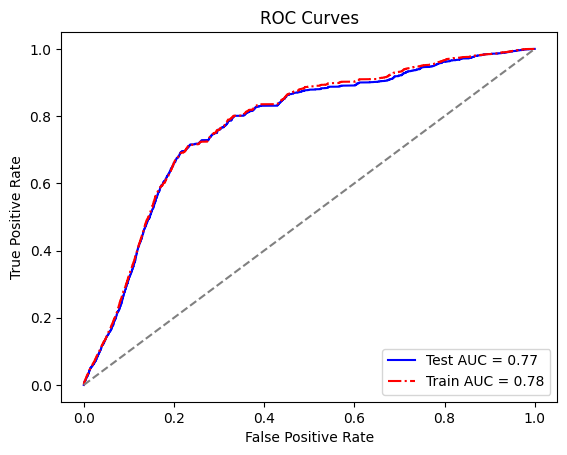

In [59]:
y_pred_labels = model.predict(X_test)
y_pred_scores = model.predict_proba(X_test)[:,1] 

y_pred_labels_train = model.predict(X_train)
y_pred_scores_train = model.predict_proba(X_train)[:, 1]
# Plot ROC curves for test set
fpr_test, tpr_test, thr_test = roc_curve(y_test, y_pred_scores)
auc_test = roc_auc_score(y_test, y_pred_scores)
plt.plot(fpr_test, tpr_test, '-b', label=f'Test AUC = {auc_test:.2f}')

# Plot ROC curves for train set
fpr_train, tpr_train, thr_train = roc_curve(y_train, y_pred_scores_train)
auc_train = roc_auc_score(y_train, y_pred_scores_train)
plt.plot(fpr_train, tpr_train, '-.r', label=f'Train AUC = {auc_train:.2f}')

plt.title('ROC Curves')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## KNN

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
K = 5
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78744   788]
 [ 2837   537]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     79532
           1       0.41      0.16      0.23      3374

    accuracy                           0.96     82906
   macro avg       0.69      0.57      0.60     82906
weighted avg       0.94      0.96      0.95     82906



In [64]:
# # The selected point on the ROC 
fig = plt.figure(figsize=(5, 5))

fpr1, tpr1, thr1 = roc_curve(y_test, y_pred)
plt.plot(fpr1, tpr1, '*-', markersize=12, label='Selected-Threshold')
print(f'fpr = {fpr1[1]}, tpr1 = {tpr1[1]}')

# The entire ROC
y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thr = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr, label='KNN')

plt.plot([0, 1], [0, 1], '--', color='gray', lw=1, alpha=0.7)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.axis('equal')
plt.show()


# Create a dataframe for the roc output
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': thr})
roc_df

fpr = 0.009907961575215007, tpr1 = 0.15915826911677533
